# Lead Scoring Case Study Assignment

In [605]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### Read the file data and store it in data frame

In [606]:
df_lead_data = pd.read_csv("Leads.csv")
df_lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [607]:
df_lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Get each column data types

In [608]:
df_lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [609]:
df_lead_data.shape

(9240, 37)

### Total - 9240 rows and 37 columns
### Let's try to identify unneccessary columns and reduce it

In [610]:
# check for duplicate 
df_lead_data.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [611]:
# check for duplicate - Lead number
df_lead_data.duplicated(subset = ['Lead Number'], keep = False).sum()

0

No duplicate values in Prospect ID and Lead Number

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

## EDA Analysis

#### Data Cleaning and remove unneccessary columns

In [612]:
#dropping Lead Number and Prospect ID since they have all unique values

df_lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [613]:
#Converting 'Select' values to NaN.

df_lead_data = df_lead_data.replace('Select', np.nan)

In [614]:
df_lead_data.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [615]:
# Dropping unique valued columns. Here which is having value 1
df_lead_data= df_lead_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [616]:
#checking null values in each rows

df_lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [617]:
# show in % 
round(100*(df_lead_data.isnull().sum())/len(df_lead_data.index),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [618]:
#dropping cols with more than 45% missing values

df_lead_data = df_lead_data.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index','Lead Profile','Lead Quality','How did you hear about X Education',],axis =1)

In [619]:
df_lead_data.shape

(9240, 23)

Now we have reduced from 37 columns to 23 columns

In [620]:
#checking null values percentage

round(100*(df_lead_data.isnull().sum()/len(df_lead_data.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

There is a huge value of null variables in some columns as seen above. 
But removing the rows with the null value will cost us a lot of data and they are important columns. 
So, instead we are going to replace the NaN values with 'not provided'. 
This way we have all the data and almost no null values. 
In case these come up in the model, it will be of no use and we can drop it off then.

In [621]:
df_lead_data['Specialization'] = df_lead_data['Specialization'].fillna('not provided')
df_lead_data['City'] = df_lead_data['City'].fillna('not provided')
df_lead_data['Tags'] = df_lead_data['Tags'].fillna('not provided')
df_lead_data['What matters most to you in choosing a course'] = df_lead_data['What matters most to you in choosing a course'].fillna('not provided')
df_lead_data['What is your current occupation'] = df_lead_data['What is your current occupation'].fillna('not provided')
df_lead_data['Country'] = df_lead_data['Country'].fillna('not provided')
df_lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [622]:
#checking null values percentage

round(100*(df_lead_data.isnull().sum()/len(df_lead_data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [623]:
df_lead_data.shape

(9240, 23)

### Categorical Attributes Analysis:

In [624]:
df_lead_data['Country'].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [625]:
def f_slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df_lead_data['Country'] = df_lead_data.apply(lambda x:f_slots(x['Country']), axis = 1)
df_lead_data['Country'].value_counts()

India            6492
not provided     2461
outside india     287
Name: Country, dtype: int64

In [626]:
# Since India is the most common occurence among the non-missing values we can impute all not provided values with India

df_lead_data['Country'] = df_lead_data['Country'].replace('not provided','India')
df_lead_data['Country'].value_counts()

India            8953
outside india     287
Name: Country, dtype: int64

In [627]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df_lead_data.isnull().sum(axis=1) > 1)/df_lead_data.shape[0]),2)

1.48

In [628]:
df_lead_data = df_lead_data[df_lead_data.isnull().sum(axis=1) <1]

In [629]:
# Rechecking the percentage of missing values
round(100*(df_lead_data.isnull().sum()/len(df_lead_data.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [630]:
df_lead_data.shape

(9074, 23)

In [631]:
def f_plot_bar(x,y,length,breadth):
    plt.figure(figsize=(length,breadth))
    s1=sns.countplot(x, hue=y)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()
    
    return None

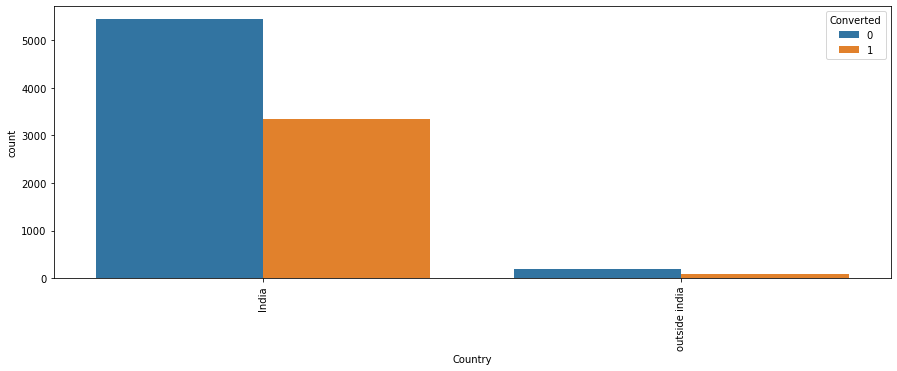

In [632]:
#plotting spread of Country columnn after replacing NaN values

f_plot_bar(df_lead_data.Country, df_lead_data.Converted, 15, 5 )

As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [633]:
#creating a list of columns to be droppped

cols_to_drop=['Country']

In [634]:
#checking value counts of "City" column

df_lead_data['City'].value_counts(dropna=False)

not provided                   3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

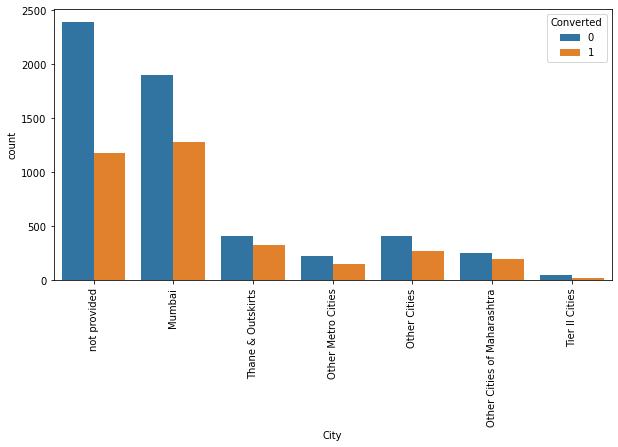

In [635]:
#plotting spread of City columnn

f_plot_bar(df_lead_data.City, df_lead_data.Converted, 10,5)

In [636]:
def f_plot_subplot(source, title, subplot_length, subplot_breadth, subplot_position):
    plt.subplot(subplot_length,subplot_breadth,subplot_position)
    if subplot_position == 12 or subplot_length == 2:
        sns.countplot(source).tick_params(axis='x', rotation = 90)
    else:
        sns.countplot(source)
    plt.title(title)
    
    return None

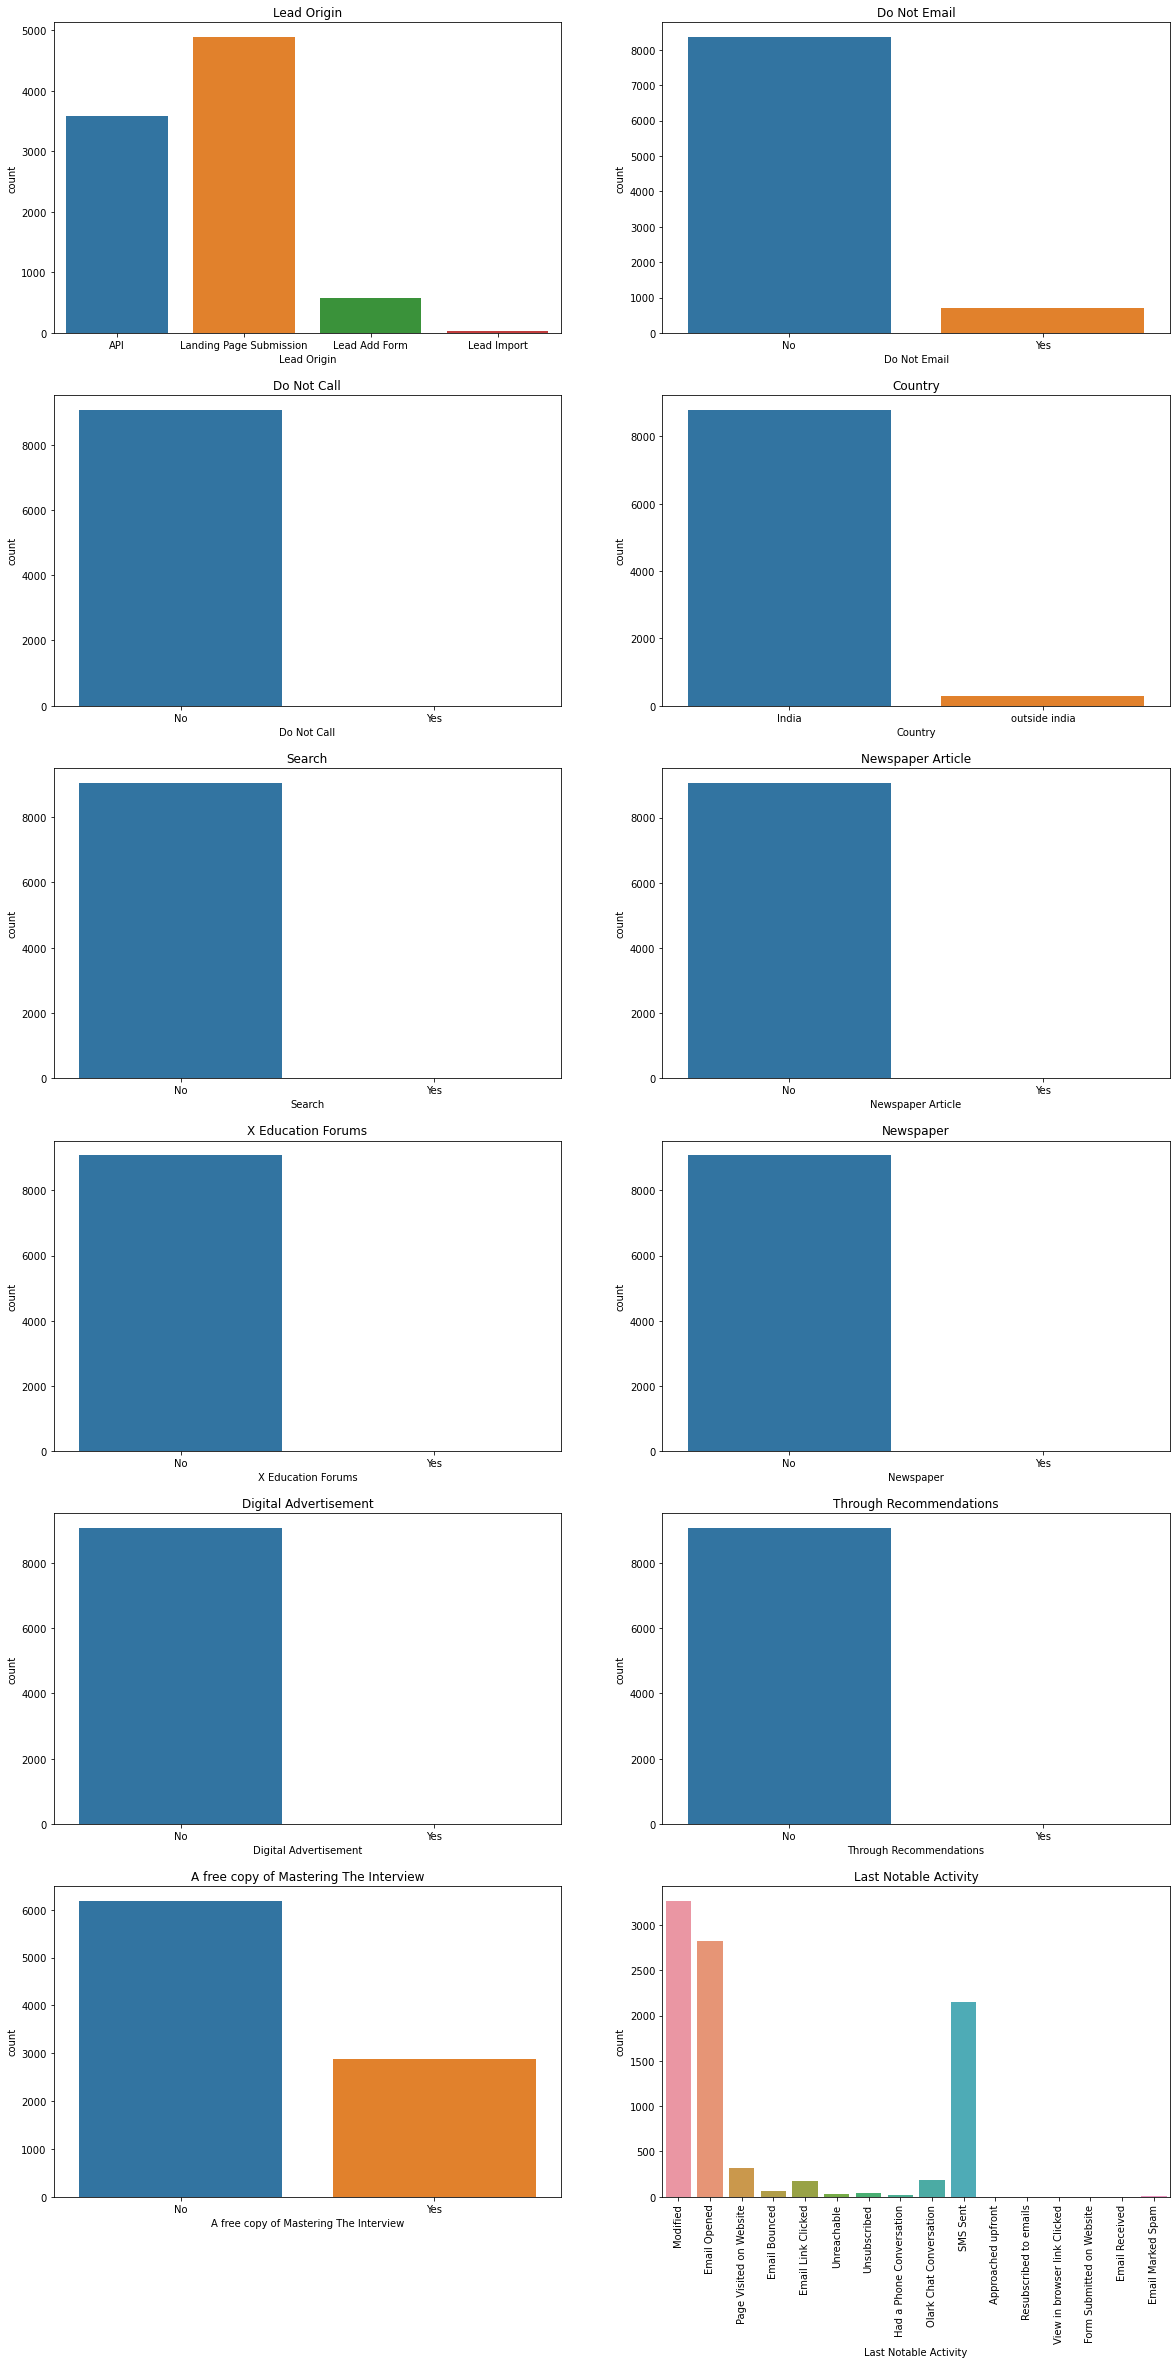

In [637]:
plt.figure(figsize = (20,40))
f_plot_subplot(df_lead_data['Lead Origin'], 'Lead Origin', 6,2,1,)
f_plot_subplot(df_lead_data['Do Not Email'], 'Do Not Email', 6,2,2)
f_plot_subplot(df_lead_data['Do Not Call'], 'Do Not Call', 6,2,3)
f_plot_subplot(df_lead_data['Country'], 'Country', 6,2,4)
f_plot_subplot(df_lead_data['Search'], 'Search', 6,2,5)
f_plot_subplot(df_lead_data['Newspaper Article'], 'Newspaper Article', 6,2,6)
f_plot_subplot(df_lead_data['X Education Forums'], 'X Education Forums', 6,2,7)
f_plot_subplot(df_lead_data['Newspaper'], 'Newspaper', 6,2,8)
f_plot_subplot(df_lead_data['Digital Advertisement'], 'Digital Advertisement', 6,2,9)
f_plot_subplot(df_lead_data['Through Recommendations'], 'Through Recommendations', 6,2,10)
f_plot_subplot(df_lead_data['A free copy of Mastering The Interview'], 'A free copy of Mastering The Interview', 6,2,11)
f_plot_subplot(df_lead_data['Last Notable Activity'], 'Last Notable Activity', 6,2,12)
plt.show()

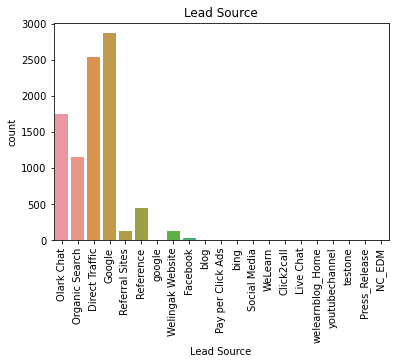

In [638]:
sns.countplot(df_lead_data['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

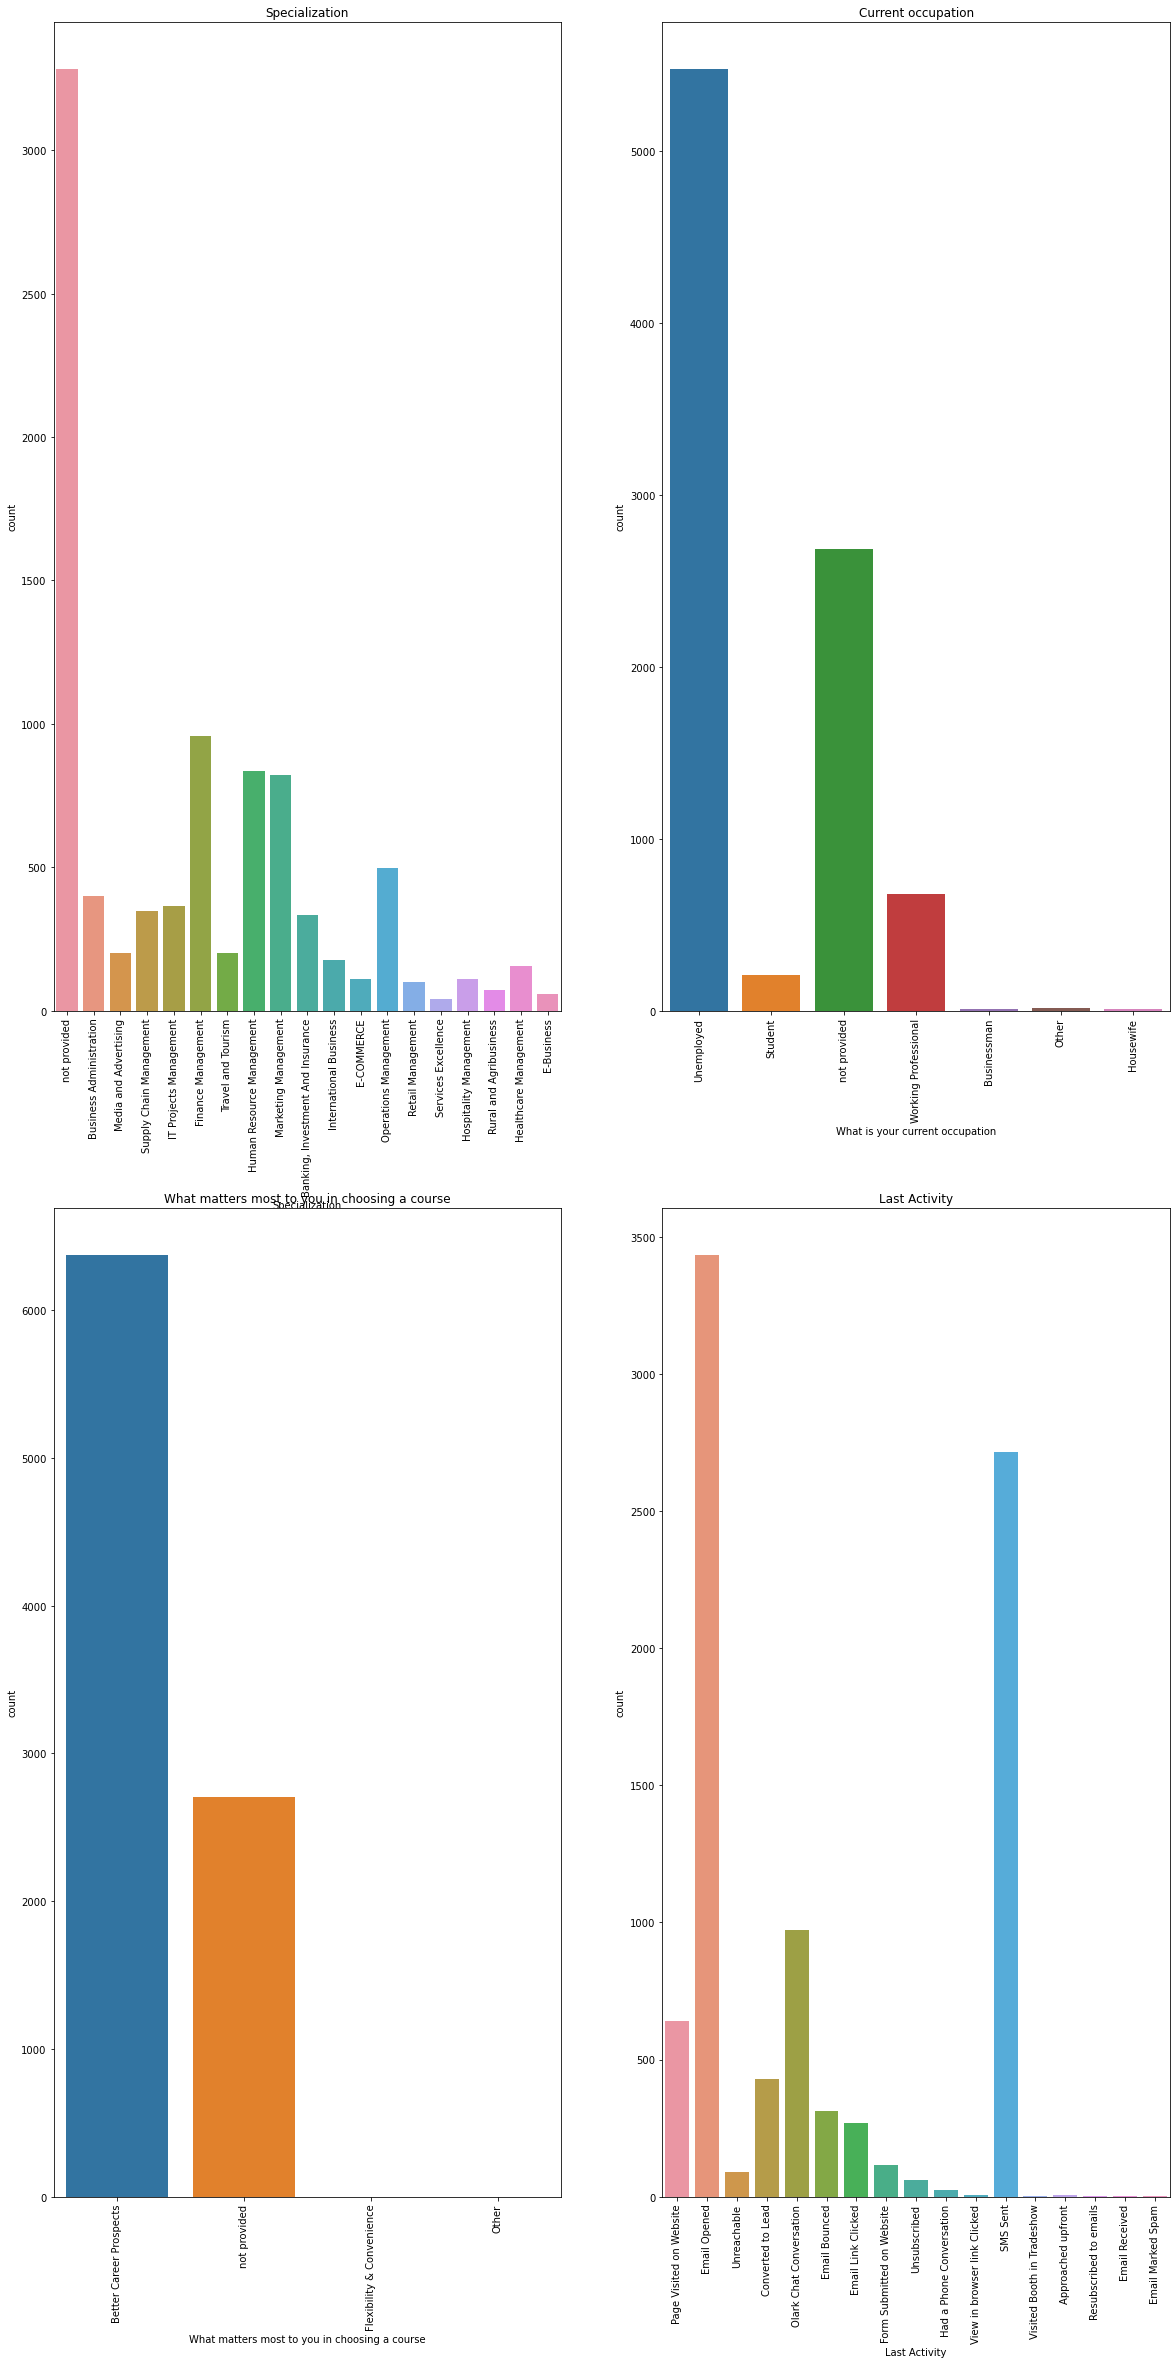

In [639]:
plt.figure(figsize = (20,40))
f_plot_subplot(df_lead_data['Specialization'], 'Specialization', 2,2,1)
f_plot_subplot(df_lead_data['What is your current occupation'], 'Current occupation', 2,2,2)
f_plot_subplot(df_lead_data['What matters most to you in choosing a course'], 'What matters most to you in choosing a course', 2,2,3)
f_plot_subplot(df_lead_data['Last Activity'], 'Last Activity', 2,2,4)
plt.show()


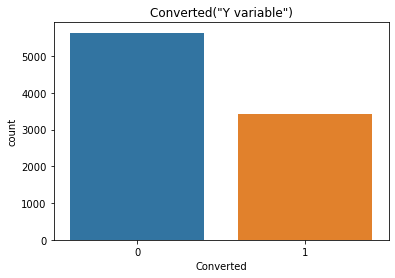

In [640]:
sns.countplot(df_lead_data['Converted'])
plt.title('Converted("Y variable")')
plt.show()

## Numerical Variables

In [641]:
def f_hist_plot(x,source,title,bins):
    plt.subplot(x)
    plt.hist(source, bins = bins)
    plt.title(title)
    
    return None

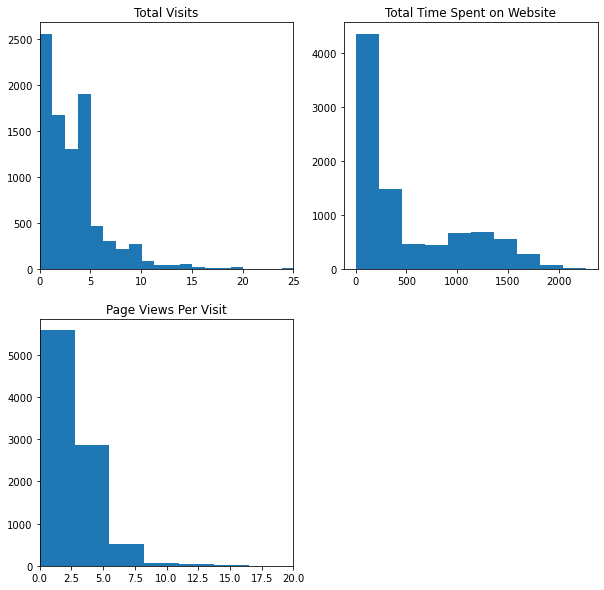

In [642]:
plt.figure(figsize = (10,10))
f_hist_plot(221, df_lead_data['TotalVisits'], 'Total Visits', 200)
plt.xlim(0,25)
f_hist_plot(222, df_lead_data['Total Time Spent on Website'], 'Total Time Spent on Website', 10)
f_hist_plot(223, df_lead_data['Page Views Per Visit'], 'Page Views Per Visit', 20)
plt.xlim(0,20)
plt.show()

## Relating all the categorical variables to Converted

In [643]:
def f_cat_subplot(x,hue,source, pos1, pos2, pos3):
    plt.subplot(pos1,pos2,pos3)
    sns.countplot(x=x, hue=hue, data= source).tick_params(axis='x', rotation = 90)
    plt.title(x)
    
    return None

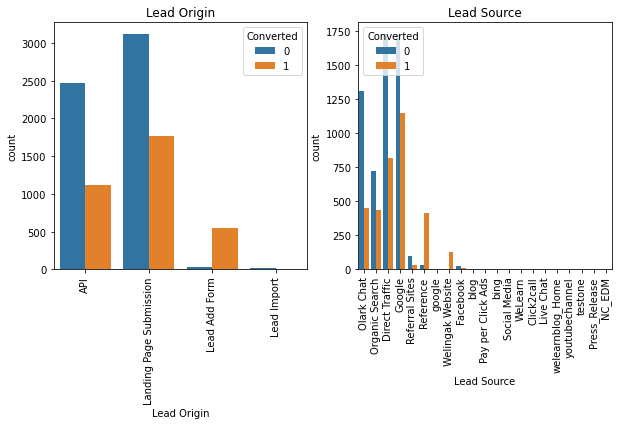

In [644]:
plt.figure(figsize = (10,10))
f_cat_subplot('Lead Origin', 'Converted', df_lead_data,2,2,1)
f_cat_subplot('Lead Source', 'Converted', df_lead_data,2,2,2)
plt.show()

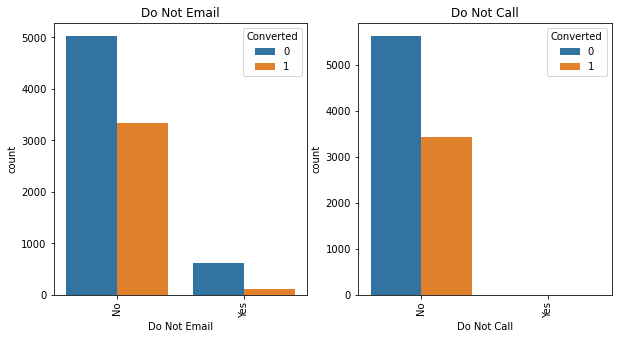

In [645]:
plt.figure(figsize = (10,5))
f_cat_subplot('Do Not Email', 'Converted', df_lead_data,1,2,1)
f_cat_subplot('Do Not Call', 'Converted', df_lead_data,1,2,2)
plt.show()

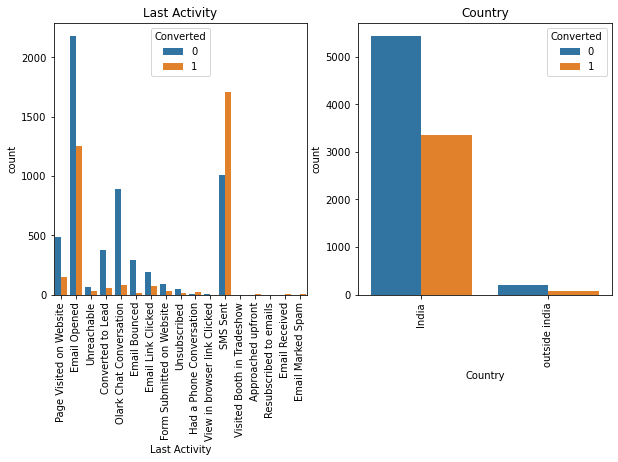

In [646]:
plt.figure(figsize = (10,5))
f_cat_subplot('Last Activity', 'Converted', df_lead_data,1,2,1)
f_cat_subplot('Country', 'Converted', df_lead_data,1,2,2)
plt.show()

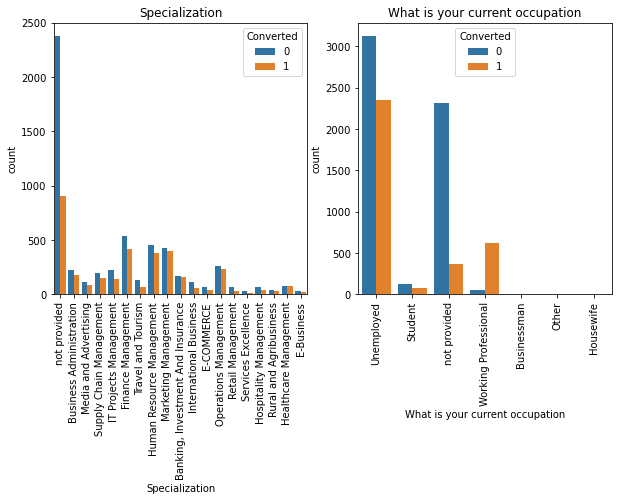

In [647]:
plt.figure(figsize = (10,5))
f_cat_subplot('Specialization', 'Converted', df_lead_data,1,2,1)
f_cat_subplot('What is your current occupation', 'Converted', df_lead_data,1,2,2)
plt.show()

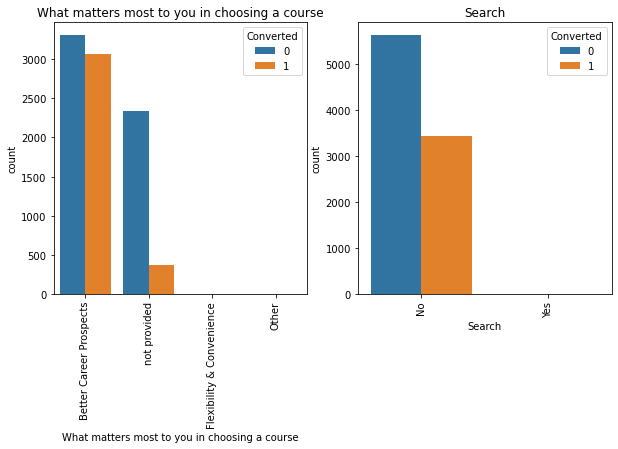

In [648]:
plt.figure(figsize = (10,5))
f_cat_subplot('What matters most to you in choosing a course', 'Converted', df_lead_data,1,2,1)
f_cat_subplot('Search', 'Converted', df_lead_data,1,2,2)
plt.show()

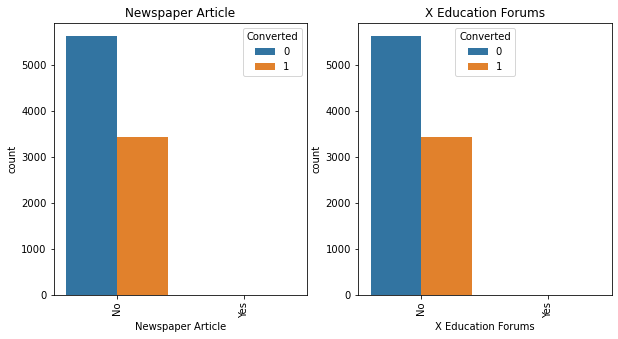

In [649]:
plt.figure(figsize = (10,5))
f_cat_subplot('Newspaper Article', 'Converted', df_lead_data,1,2,1)
f_cat_subplot('X Education Forums', 'Converted', df_lead_data,1,2,2)
plt.show()

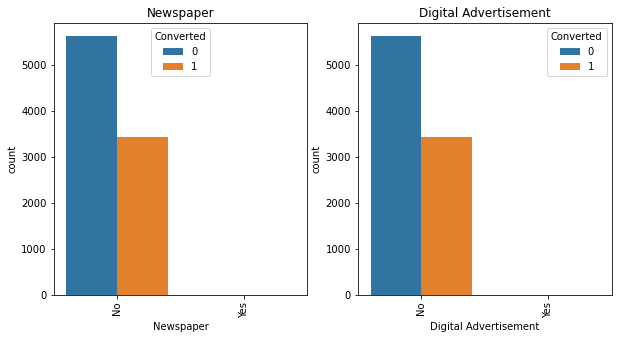

In [650]:
plt.figure(figsize = (10,5))
f_cat_subplot('Newspaper', 'Converted', df_lead_data,1,2,1)
f_cat_subplot('Digital Advertisement', 'Converted', df_lead_data,1,2,2)
plt.show()

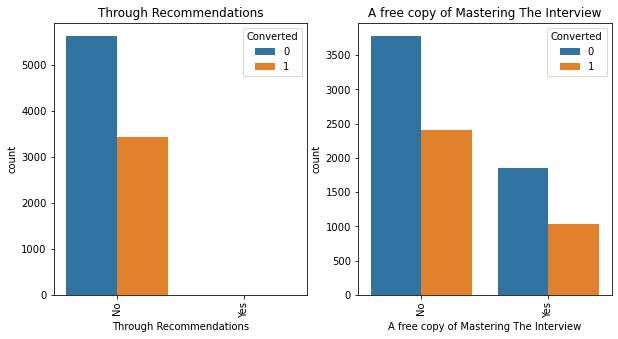

In [651]:
plt.figure(figsize = (10,5))
f_cat_subplot('Through Recommendations', 'Converted', df_lead_data,1,2,1)
f_cat_subplot('A free copy of Mastering The Interview', 'Converted', df_lead_data,1,2,2)
plt.show()

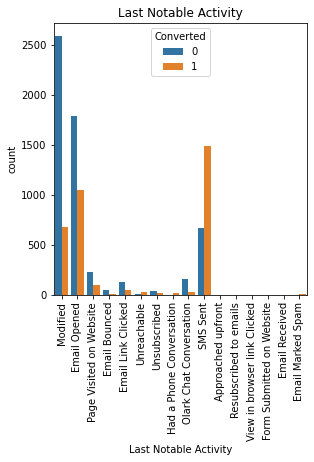

In [652]:
plt.figure(figsize = (10,5))
f_cat_subplot('Last Notable Activity', 'Converted', df_lead_data,1,2,1)
plt.show()

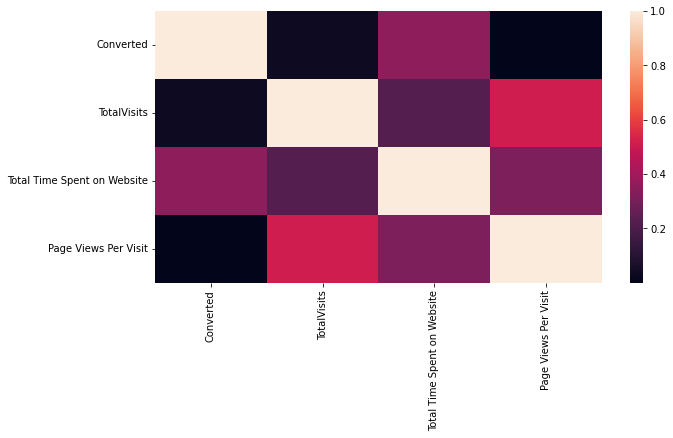

In [653]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df_lead_data.corr())
plt.show()

It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.

## Outlier

In [654]:
numeric = df_lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


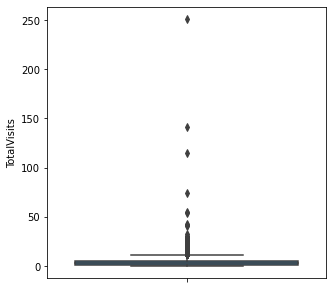

In [655]:
plt.figure(figsize = (5,5))
sns.boxplot(y=df_lead_data['TotalVisits'])
plt.show()

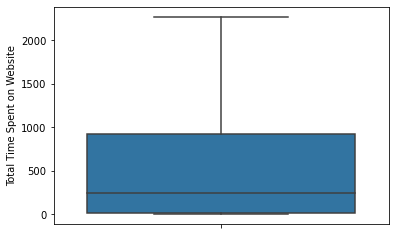

In [656]:
sns.boxplot(y=df_lead_data['Total Time Spent on Website'])
plt.show()

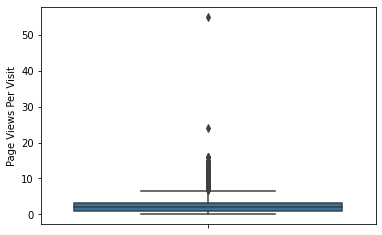

In [657]:
sns.boxplot(y=df_lead_data['Page Views Per Visit'])
plt.show()

We can see presence of outliers in TotalVisits

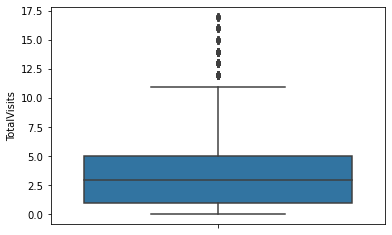

In [658]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df_lead_data.TotalVisits.quantile(0.99)
df_lead_data = df_lead_data[(df_lead_data.TotalVisits <= Q3)]
Q1 = df_lead_data.TotalVisits.quantile(0.01)
df_lead_data = df_lead_data[(df_lead_data.TotalVisits >= Q1)]
sns.boxplot(y=df_lead_data['TotalVisits'])
plt.show()

## Dummy Variables

In [659]:
#list of columns to be dropped
cols_to_drop=['Country','Tags']

We can drop "Tags" ,As tags variable is generated by the sales sales team after the disscussion with student otherwise it will increase the model accuracy .

In [660]:
#dropping columns
df_lead_data = df_lead_data.drop(cols_to_drop,1)
df_lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [661]:
#getting a list of categorical columns

cat_cols= df_lead_data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [662]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_lead_data[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_lead_data_dum = pd.concat([df_lead_data, dummy], axis=1)
df_lead_data_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,not provided,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,not provided,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [663]:
df_lead_data_dum = df_lead_data_dum.drop(['City','What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_lead_data_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Test-Train Split

In [664]:
 #Import the required library
from sklearn.model_selection import train_test_split

In [665]:
X = df_lead_data_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [666]:
# Putting the target variable in y
y = df_lead_data_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [667]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [668]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building

In [680]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [681]:
# Import RFE
from sklearn.feature_selection import RFE

In [682]:
# Running RFE with 20 variables as output
rfe = RFE(lr, step=15)
rfe = rfe.fit(X_train, y_train)

In [683]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Specialization_E-Business', False, 3),
 ('Specialization_Finance Management', False, 3),
 ('Specialization_Healthcare Management', False, 3),
 ('Specialization_Human Resource Management', False, 3),
 ('Specialization_Marketing Management', False, 3),
 ('Lead Source_Direct Traffic', False, 2),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', False, 3),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Had a Phone Conversation', False, 3),
 ('Last Activity_Olark Cha

In [684]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

All the variables selected by RFE, next statistics part (p-values and the VIFs)

In [685]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Unreachable',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [686]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [687]:
# Importing statsmodels
import statsmodels.api as sm

In [688]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()
#lr_2 = sm.OLS(y_train, X_train_sm).fit()
#print(lr_2.summary())

#X_train_sm.columns

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2565.6
Date:                Sat, 25 Feb 2023   Deviance:                       5131.3
Time:                        14:01:30   Pearson chi2:                 6.43e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3999
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8230      0.109     -7.521      0.000      -1.037      -0.609
TotalVisits                                              1.2074      0.292      4.137      0.000       0.635       1.779
Total Time Spent on Website                              4.1201      0.158     26.007      0.000       3.810       4.431
Page Views Per Visit                                    -3.7307      0.426     -8.755      0.000      -4.566      -2.896
Lead Origin_Lead Add Form                                3.3225      0.251     13.220      0.000       2.830       3.815
Lead Source_Welingak Website                             2.3869      1.039      2.298      0.022       0.351       4.423
Do Not Email_Yes                                        -1.4805      0.202     -7.323      0.000      -1.877      -1.084
Last Activity_Converted to Lead                         -1.1495      0.208     -5.514      0.000      -1.558      -0.741
Last Activity_Email Bounced                             -1.2779      0.388     -3.295      0.001      -2.038      -0.518
Last Activity_Olark Chat Conversation                   -1.0450      0.196     -5.340      0.000      -1.429      -0.661
Last Activity_Unreachable                               -0.8935      0.427     -2.093      0.036      -1.730      -0.057
What is your current occupation_Housewife               23.8684      3e+04      0.001      0.999   -5.87e+04    5.87e+04
What is your current occupation_Other                    1.5079      0.757      1.992      0.046       0.024       2.992
What is your current occupation_Unemployed               0.8999      0.084     10.726      0.000       0.735       1.064
What is your current occupation_Working Professional     3.3844      0.199     16.973      0.000       2.994       3.775
Last Notable Activity_Email Link Clicked                -1.8352      0.273     -6.731      0.000      -2.370      -1.301
Last Notable Activity_Email Opened                      -1.3485      0.089    -15.109      0.000      -1.523      -1.174
Last Notable Activity_Had a Phone Conversation          22.1914   2.27e+04      0.001      0.999   -4.45e+04    4.46e+04
Last Notable Activity_Modified                          -1.5824      0.103    -15.366      0.000      -1.784      -1.381
Last Notable Activity_Olark Chat Conversation           -1.2657      0.384     -3.298      0.001      -2.018      -0.514
Last Notable Activity_Page Visited on Website           -2.0071      0.214     -9.363      0.000      -2.427      -1.587
========================================================================================================================
"""

In [689]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [690]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.37
0,TotalVisits,5.31
12,What is your current occupation_Unemployed,2.45
17,Last Notable Activity_Modified,2.44
1,Total Time Spent on Website,2.11
5,Do Not Email_Yes,1.90
7,Last Activity_Email Bounced,1.87
8,Last Activity_Olark Chat Conversation,1.85
3,Lead Origin_Lead Add Form,1.62
15,Last Notable Activity_Email Opened,1.61


#### The VIF values seem fine but some p-values are 99 %. So removing ' What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'.

In [691]:
X_train.drop(['What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [692]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6274
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.6
Date:                Sat, 25 Feb 2023   Deviance:                       5145.1
Time:                        14:01:52   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3986
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8077      0.109     -7.397      0.000      -1.022      -0.594
TotalVisits                                              1.2109      0.291      4.166      0.000       0.641       1.781
Total Time Spent on Website                              4.1229      0.158     26.058      0.000       3.813       4.433
Page Views Per Visit                                    -3.7235      0.425     -8.760      0.000      -4.557      -2.890
Lead Origin_Lead Add Form                                3.3716      0.251     13.416      0.000       2.879       3.864
Lead Source_Welingak Website                             2.3399      1.039      2.253      0.024       0.304       4.376
Do Not Email_Yes                                        -1.4889      0.202     -7.359      0.000      -1.885      -1.092
Last Activity_Converted to Lead                         -1.1533      0.208     -5.534      0.000      -1.562      -0.745
Last Activity_Email Bounced                             -1.2754      0.388     -3.288      0.001      -2.036      -0.515
Last Activity_Olark Chat Conversation                   -1.0505      0.196     -5.370      0.000      -1.434      -0.667
Last Activity_Unreachable                               -0.9000      0.427     -2.106      0.035      -1.737      -0.063
What is your current occupation_Other                    1.4939      0.757      1.974      0.048       0.010       2.978
What is your current occupation_Unemployed               0.8866      0.084     10.617      0.000       0.723       1.050
What is your current occupation_Working Professional     3.3704      0.199     16.913      0.000       2.980       3.761
Last Notable Activity_Email Link Clicked                -1.8219      0.270     -6.756      0.000      -2.350      -1.293
Last Notable Activity_Email Opened                      -1.3526      0.089    -15.176      0.000      -1.527      -1.178
Last Notable Activity_Modified                          -1.5853      0.103    -15.414      0.000      -1.787      -1.384
Last Notable Activity_Olark Chat Conversation           -1.2700      0.384     -3.311      0.001      -2.022      -0.518
Last Notable Activity_Page Visited on Website           -2.0156      0.214     -9.408      0.000      -2.436      -1.596
========================================================================================================================
"""

In [693]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.37
0,TotalVisits,5.30
11,What is your current occupation_Unemployed,2.44
15,Last Notable Activity_Modified,2.44
1,Total Time Spent on Website,2.11
5,Do Not Email_Yes,1.90
7,Last Activity_Email Bounced,1.87
8,Last Activity_Olark Chat Conversation,1.85
14,Last Notable Activity_Email Opened,1.61
3,Lead Origin_Lead Add Form,1.61


### Model 3 

Dropping again the VIF column > 5

In [694]:
# Dropping highly correlated variables and insignificant variables

X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [695]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6275
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2612.8
Date:                Sat, 25 Feb 2023   Deviance:                       5225.6
Time:                        14:02:06   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3908
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0452      0.106     -9.890      0.000      -1.252      -0.838
TotalVisits                                             -0.5008      0.221     -2.261      0.024      -0.935      -0.067
Total Time Spent on Website                              3.9291      0.154     25.480      0.000       3.627       4.231
Lead Origin_Lead Add Form                                3.5824      0.250     14.314      0.000       3.092       4.073
Lead Source_Welingak Website                             2.3440      1.039      2.256      0.024       0.308       4.380
Do Not Email_Yes                                        -1.5320      0.199     -7.698      0.000      -1.922      -1.142
Last Activity_Converted to Lead                         -1.0795      0.207     -5.210      0.000      -1.486      -0.673
Last Activity_Email Bounced                             -1.1221      0.381     -2.944      0.003      -1.869      -0.375
Last Activity_Olark Chat Conversation                   -0.9032      0.194     -4.649      0.000      -1.284      -0.522
Last Activity_Unreachable                               -0.9437      0.435     -2.168      0.030      -1.797      -0.091
What is your current occupation_Other                    1.6250      0.735      2.211      0.027       0.185       3.065
What is your current occupation_Unemployed               0.8625      0.083     10.412      0.000       0.700       1.025
What is your current occupation_Working Professional     3.3232      0.198     16.793      0.000       2.935       3.711
Last Notable Activity_Email Link Clicked                -1.6817      0.267     -6.299      0.000      -2.205      -1.158
Last Notable Activity_Email Opened                      -1.2866      0.088    -14.644      0.000      -1.459      -1.114
Last Notable Activity_Modified                          -1.5497      0.102    -15.227      0.000      -1.749      -1.350
Last Notable Activity_Olark Chat Conversation           -1.1211      0.374     -2.995      0.003      -1.855      -0.387
Last Notable Activity_Page Visited on Website           -1.6219      0.203     -7.978      0.000      -2.020      -1.223
========================================================================================================================
"""

In [696]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.57
14,Last Notable Activity_Modified,2.39
10,What is your current occupation_Unemployed,2.38
1,Total Time Spent on Website,2.06
4,Do Not Email_Yes,1.89
6,Last Activity_Email Bounced,1.87
7,Last Activity_Olark Chat Conversation,1.84
2,Lead Origin_Lead Add Form,1.60
13,Last Notable Activity_Email Opened,1.59
15,Last Notable Activity_Olark Chat Conversation,1.37


### All the VIF values are good and all the p-values are below 0.05. So we can fix model.

#### Creating Prediction

In [697]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.172709
3267    0.996807
5653    0.514807
5072    0.088521
3704    0.195017
1790    0.095417
2482    0.243670
1694    0.069467
8768    0.176460
9225    0.013158
dtype: float64

In [698]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17270893, 0.996807  , 0.51480697, 0.08852074, 0.19501745,
       0.09541708, 0.24366989, 0.06946702, 0.17646046, 0.01315795])

In [699]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.172709
1,1,0.996807
2,1,0.514807
3,0,0.088521
4,0,0.195017


In [700]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.172709,0
1,1,0.996807,1
2,1,0.514807,1
3,0,0.088521,0
4,0,0.195017,0


### Model Evaluation

In [701]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [702]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3452,  463],
       [ 780, 1598]], dtype=int64)

In [705]:
# Predicted        No         Yes
# Actual
# No              3452      463
# Yes             780      1598

In [706]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8024789448593675

That's around 80% accuracy with is a very good value

In [707]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [708]:
# Calculating the sensitivity
TP/(TP+FN)

0.6719932716568545

In [709]:
# Calculating the specificity
TN/(TN+FP)

0.8817369093231162

With the current cut off as 0.5 we have around 80% accuracy, sensitivity of around 67% and specificity of around 88%.

### Optimise Cut off (ROC Curve)

The previous cut off was randomely selected. Now to find the optimum one

In [711]:
# ROC function
def f_draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [712]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

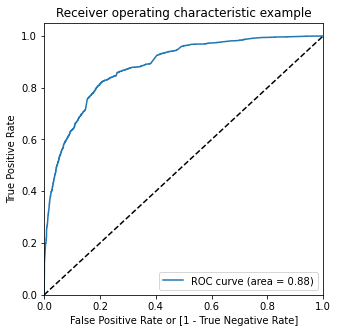

In [713]:
# Call the ROC function
f_draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.88 which is a very good value

In [714]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.172709,0,1,1,0,0,0,0,0,0,0,0
1,1,0.996807,1,1,1,1,1,1,1,1,1,1,1
2,1,0.514807,1,1,1,1,1,1,1,0,0,0,0
3,0,0.088521,0,1,0,0,0,0,0,0,0,0,0
4,0,0.195017,0,1,1,0,0,0,0,0,0,0,0


In [715]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.617829,0.972666,0.402299
0.2,0.2,0.736850,0.885618,0.646488
0.3,0.3,0.797871,0.829268,0.778799
0.4,0.4,0.807564,0.788478,0.819157
0.5,0.5,0.802479,0.671993,0.881737
0.6,0.6,0.797712,0.583684,0.927714
0.7,0.7,0.781503,0.494954,0.955556
0.8,0.8,0.756873,0.401177,0.972925
0.9,0.9,0.715557,0.264087,0.989783


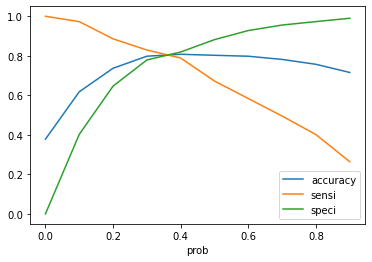

In [716]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the graph it is visible that the optimal cut off is at 0.35.

In [717]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.172709,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.996807,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.514807,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.088521,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.195017,0,1,1,0,0,0,0,0,0,0,0,0


In [718]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8050214524074368

In [719]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3137,  778],
       [ 449, 1929]], dtype=int64)

In [720]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [721]:
# Calculating the sensitivity
TP/(TP+FN)

0.8111858704793945

In [722]:
# Calculating the specificity
TN/(TN+FP)

0.8012771392081737

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

### Prediction on Test set

In [723]:
#Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [724]:
col = X_train.columns

In [725]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Unreachable,What is your current occupation_Other,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3308,1.0,0.117647,0.050176,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4421,1.0,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8855,1.0,0.058824,0.547975,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
5302,1.0,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2169,1.0,0.588235,0.390405,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.058824,0.218310,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7836,1.0,0.588235,0.227113,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
8378,1.0,0.588235,0.179577,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1263,1.0,0.117647,0.376320,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [726]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.100326
1,1,0.454434
2,1,0.334384
3,0,0.029366
4,0,0.251149


In [727]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.100326,0
1,1,0.454434,1
2,1,0.334384,0
3,0,0.029366,0
4,0,0.251149,0
...,...,...,...
2693,1,0.054880,0
2694,1,0.767474,1
2695,0,0.050899,0
2696,1,0.975818,1


In [728]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8065233506300964

In [729]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1351,  326],
       [ 196,  825]], dtype=int64)

In [730]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [731]:
# Calculating the sensitivity
TP/(TP+FN)

0.8080313418217434

In [732]:
# Calculating the specificity
TN/(TN+FP)

0.8056052474657126

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

### Precision-Recall

In [733]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3452,  463],
       [ 780, 1598]], dtype=int64)

In [734]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7753517709849588

In [735]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6719932716568545

With the current cut off as 0.35 we have Precision around 77% and Recall around 67%

### Precision and recall tradeoff

In [736]:
from sklearn.metrics import precision_recall_curve

In [737]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    0
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

In [738]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

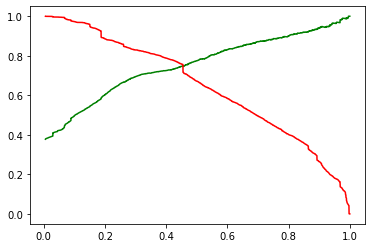

In [739]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [740]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.172709,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.996807,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.514807,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.088521,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.195017,0,1,1,0,0,0,0,0,0,0,0,0


In [741]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8074050532337518

In [742]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3221,  694],
       [ 518, 1860]], dtype=int64)

In [743]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [744]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7282693813625685

In [745]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7821698906644239

With the current cut off as 0.41 we have Precision around 73% and Recall around 78.2% and accuracy 80 %.

### Prediction on Test set

In [746]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.100326
1,1,0.454434
2,1,0.334384
3,0,0.029366
4,0,0.251149


In [747]:
# Making prediction using cut off 0.44
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.100326,0
1,1,0.454434,1
2,1,0.334384,0
3,0,0.029366,0
4,0,0.251149,0
...,...,...,...
2693,1,0.054880,0
2694,1,0.767474,1
2695,0,0.050899,0
2696,1,0.975818,1


### Check the overall accuracy

In [748]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8031875463306153

In [749]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1395,  282],
       [ 249,  772]], dtype=int64)

In [750]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [751]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7324478178368121

In [752]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7561214495592556

With the current cut off as 0.41 we have Precision around 73% , Recall around 75% and accuracy 80.3%.

The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

### Conclusion

It was found that the variables that mattered the most in the potential buyers are (In descending order) :